# Quantium Virtual Internship - Retail Strategy and Analytics - Task 2 (Experimentation and Uplift Testing)

For this part of the project, I will be evaluating the performance of a store trial performed in stores 77, 86, and 88 vs control stores to provide a recommendation for each location based on our insight. Below are some of the areas I will focus on and if i
discover any other interesting insights, I will include them in my findings.

**Select Control Stores** - Explore the data and define metrics for your control store selection - think about what would make them a control store. Look at the drivers and make sure you visualie these in a graph to better determine if they are suited. For this piece, it may even be worth creating a function to help you.

**Assessment of the Trial** - This one should give me some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not.

**Collate Findings** - Summarise my findings for each store and provide a recommendation that I can share with Julia outlining the impact on sales during the trial period.

To get started, use the QVI_data dataset below or your output from task 1 and consider the monthly sales experience of each store. 

This can be broken down by:
- total sales revenue
- total number of customers
- average number of transactions per customer

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df1 = pd.read_csv(r"C:\Users\Toyosi\Documents\Quantium\QVI_data.csv")
df1

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [3]:
df1["DATE"].describe()

count         264834
unique           364
top       2018-12-24
freq             939
Name: DATE, dtype: object

**Creating a `Month_Year` column**

In [4]:
df1["DATE"] = pd.to_datetime(df1["DATE"])
df1["Month_Year"] = df1["DATE"].dt.strftime("%Y/%m")

## Select Control Stores

In [5]:
df1["Month_Year"] = pd.to_datetime(df1["Month_Year"])
nbr = df1[(df1['Month_Year'] >= "2018/07") & (df1['Month_Year'] < "2019/02")]

**Grouping specific `Month_Year` by `STORE_NBR` and `TOT_SALES`**

In [6]:
grpd_str = nbr.groupby("STORE_NBR")["TOT_SALES"].sum()

**Looking for `TOT_SALES` in trial stores**

### Store 77

In [7]:
trial_store = grpd_str[76:88]
trial_store

STORE_NBR
77    1699.00
78    5466.40
79    7143.15
80    6953.40
81    8260.30
82    2289.90
83    5739.80
84    3238.50
85      13.90
86    6119.85
87    2385.50
88    9383.60
Name: TOT_SALES, dtype: float64

**Total Sales for trial stores from July 2018 to February 2019**
|Store|Total Sale|
|:-:|:-:|
|77| 1699.00|
|86|6119.85|
|88|9383.60|

To find the matching control stores for each trial store from 272 stores, I will use two methods. 
1. I will first go by total sales to find stores with similar total sales during this period.
2. Then I will use the pearson correlation test to determine how correlated the two stores are.

**Sorting stores by `TOT_SALES` looking for a match for store 77**

In [8]:
ctrl = grpd_str.sort_values(ascending = True)
ctrl.iloc[63:73]

STORE_NBR
53     1611.1
6      1618.8
255    1636.6
233    1659.8
188    1683.5
77     1699.0
187    1702.2
90     1736.4
46     1758.0
220    1788.6
Name: TOT_SALES, dtype: float64

**Isolating stores by `TOT_SALES` looking for a match for store 77**

In [9]:
total_grp = nbr.groupby(['STORE_NBR', 'Month_Year'])['TOT_SALES'].sum()

In [10]:
ctrl_str = [6, 46, 77, 90, 185, 187, 188, 205, 233, 255]
control_str = pd.DataFrame({'Value': total_grp[ctrl_str]})
control_str

Value
STORE_NBR Month_Year       
6         2018-07-01  260.0
          2018-08-01  203.2
          2018-09-01  207.7
          2018-10-01  292.4
          2018-11-01  255.3
...                     ...
255       2018-09-01  227.7
          2018-10-01  235.6
          2018-11-01  253.2
          2018-12-01  262.4
          2019-01-01  231.7

[70 rows x 1 columns]

**Placing the `Value` in a pivot chart format**

In [11]:
pivot_table1 = control_str.pivot_table(index= "Month_Year", columns= "STORE_NBR", values= "Value")
pivot_table1

STORE_NBR,6,46,77,90,185,187,188,205,233,255
Month_Year,,,,,,,,,,
2018-07-01,260.0,253.0,296.8,235.4,225.6,253.9,234.4,320.6,290.7,254.1
2018-08-01,203.2,240.7,255.5,224.5,276.3,214.3,210.3,283.6,285.9,171.9
2018-09-01,207.7,233.0,225.2,162.4,196.9,276.1,280.8,215.5,228.6,227.7
2018-10-01,292.4,275.1,204.5,319.4,216.1,181.4,246.3,274.7,185.7,235.6
2018-11-01,255.3,273.1,245.3,226.2,202.3,327.9,236.8,224.2,211.6,253.2
2018-12-01,209.1,306.9,267.3,262.7,206.2,264.4,266.8,219.5,279.8,262.4
2019-01-01,191.1,176.2,204.4,305.8,261.1,184.2,208.1,256.1,177.5,231.7


**Visualizing `Value` to find correlation**

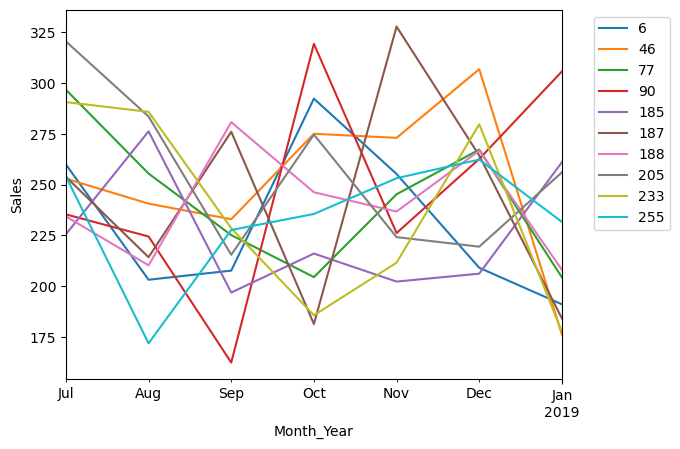

In [12]:
pivot_table1.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales')
plt.show()

**Note: On the graph, store 233 seems to follow the same progression as store 77**

**To confirm this finding, perform a pearson correlation on the pivot table**

In [13]:
pivot_table1.corr(method="pearson")

STORE_NBR,6,46,77,90,185,187,188,205,233,255
STORE_NBR,,,,,,,,,,
6,1.000000,0.484580,0.042490,0.288923,-0.413537,0.041493,0.115455,0.360925,-0.176677,0.363013
46,0.484580,1.000000,0.435650,-0.038130,-0.590286,0.433520,0.527886,-0.177358,0.401329,0.402832
77,0.042490,0.435650,1.000000,-0.377649,-0.061202,0.460669,0.042708,0.356510,0.903774,0.191091
90,0.288923,-0.038130,-0.377649,1.000000,0.290266,-0.681605,-0.422287,0.277610,-0.453268,0.177864
185,-0.413537,-0.590286,-0.061202,0.290266,1.000000,-0.643248,-0.868829,0.529503,0.096216,-0.729132
187,0.041493,0.433520,0.460669,-0.681605,-0.643248,1.000000,0.457048,-0.484031,0.280566,0.421864
188,0.115455,0.527886,0.042708,-0.422287,-0.868829,0.457048,1.000000,-0.565695,0.090490,0.461834
205,0.360925,-0.177358,0.356510,0.277610,0.529503,-0.484031,-0.565695,1.000000,0.301964,-0.249339
233,-0.176677,0.401329,0.903774,-0.453268,0.096216,0.280566,0.090490,0.301964,1.000000,-0.128047


**Further confirming that store 233 has the highest correlation with store 77 with a correlation of 0.90 or 90%**

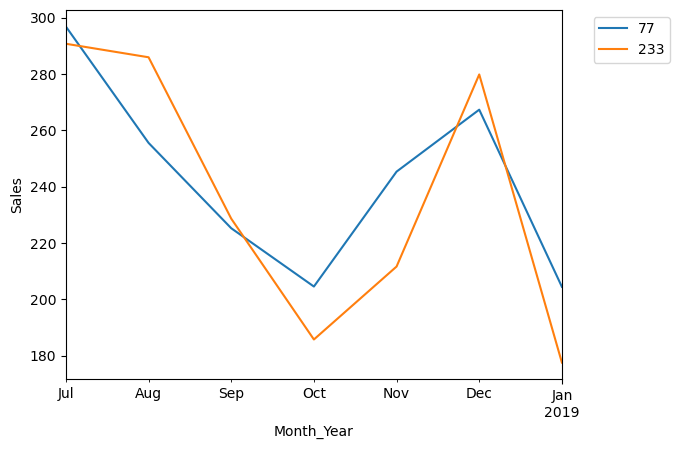

In [14]:
pvt_graph = pivot_table1[[77, 233]]
pvt_graph.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales')
plt.show()

For trial store number 77, store number 233 will be used

|Trial Store|Total Sale|Control Store|Total Store|
|:---------:|:---------:|:---------:|:---------:|
|77|1699.00|233|1659.8|
|86|6119.85|||
|88|9383.60|||

### Store 86

**Sorting stores by `TOT_SALES` looking for a match for store 86**

In [15]:
ctrl.iloc[176:186]

STORE_NBR
23     6098.90
48     6112.30
172    6113.40
13     6114.70
86     6119.85
196    6126.30
57     6147.40
30     6194.60
236    6197.40
105    6206.20
Name: TOT_SALES, dtype: float64

**Isolating 10 stores by `TOT_SALES` looking for a match for store 86**

In [16]:
ctrl_str2 = [23, 48, 172, 13, 86, 196, 57, 30, 236, 105]
control_store2 = pd.DataFrame({'Value': total_grp[ctrl_str2]})
control_store2

Value
STORE_NBR Month_Year        
23        2018-07-01   890.8
          2018-08-01   952.1
          2018-09-01   720.8
          2018-10-01   793.4
          2018-11-01   826.0
...                      ...
105       2018-09-01   846.6
          2018-10-01   880.0
          2018-11-01   771.4
          2018-12-01  1048.6
          2019-01-01   807.0

[70 rows x 1 columns]

**Placing the `Value` in a pivot chart format**

In [17]:
pivot_table2 = control_store2.pivot_table(index="Month_Year", columns="STORE_NBR", values= "Value")
pivot_table2

STORE_NBR,13,23,30,48,57,86,105,172,196,236
Month_Year,,,,,,,,,,
2018-07-01,811.8,890.8,879.8,929.4,839.6,892.20,928.9,820.8,876.2,952.0
2018-08-01,756.9,952.1,935.8,851.1,915.4,764.05,923.7,758.0,848.7,970.8
2018-09-01,840.0,720.8,860.6,809.8,792.8,914.60,846.6,816.4,858.4,864.6
2018-10-01,851.0,793.4,862.6,879.2,965.8,948.40,880.0,1040.8,846.0,879.6
2018-11-01,1049.4,826.0,819.0,785.4,830.0,918.00,771.4,851.4,770.2,705.2
2018-12-01,878.6,985.0,1014.0,917.2,951.0,841.20,1048.6,928.8,1007.4,987.0
2019-01-01,927.0,930.8,822.8,940.2,852.8,841.40,807.0,897.2,919.4,838.2


**Visualizing the Value to find correlation**

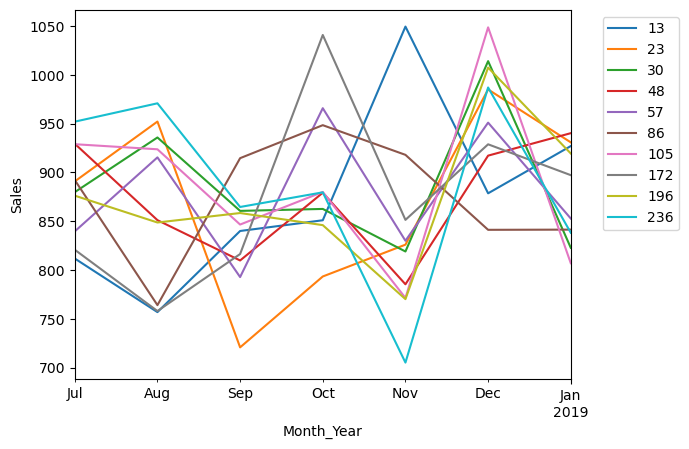

In [18]:
pivot_table2.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales')
plt.show()

**Note: On the graph, store 172 seems to follow the same progression as store 86**

**To confirm this finding, perform a pearson correlation on the pivot table**

In [19]:
pivot_table2.corr(method="pearson")

STORE_NBR,13,23,30,48,57,86,105,172,196,236
STORE_NBR,,,,,,,,,,
13,1.000000,-0.150189,-0.477595,-0.310142,-0.283500,0.409610,-0.563172,0.240211,-0.270657,-0.853592
23,-0.150189,1.000000,0.594336,0.620930,0.458281,-0.784698,0.558633,-0.115548,0.600215,0.515399
30,-0.477595,0.594336,1.000000,0.292305,0.599159,-0.516913,0.952586,-0.021631,0.689615,0.805425
48,-0.310142,0.620930,0.292305,1.000000,0.363605,-0.271147,0.479948,0.303527,0.735414,0.573430
57,-0.283500,0.458281,0.599159,0.363605,1.000000,-0.218110,0.603628,0.593520,0.393114,0.495600
86,0.409610,-0.784698,-0.516913,-0.271147,-0.218110,1.000000,-0.381464,0.524475,-0.373196,-0.520981
105,-0.563172,0.558633,0.952586,0.479948,0.603628,-0.381464,1.000000,0.083882,0.739672,0.888408
172,0.240211,-0.115548,-0.021631,0.303527,0.593520,0.524475,0.083882,1.000000,0.239403,-0.086124
196,-0.270657,0.600215,0.689615,0.735414,0.393114,-0.373196,0.739672,0.239403,1.000000,0.665074


**Store 172 has the highest correlation with store 86 with a correlation of 0.524475 or 52%.
While the `TOT_SALES` of the 9 stores have a close fit to the `TOT_SALES` of store 86, it is not a good fit in terms of correlation.
The stores with `TOT_SALES` 14 stores below store 86 would be checked.**

**Sorting stores by `TOT_SALES` looking for a match for store 86**

In [20]:
ctrl.iloc[180:195]

STORE_NBR
86     6119.85
196    6126.30
57     6147.40
30     6194.60
236    6197.40
105    6206.20
91     6230.00
109    6238.30
97     6264.95
180    6265.70
102    6286.00
164    6289.40
155    6308.70
184    6309.00
160    6311.60
Name: TOT_SALES, dtype: float64

**Isolating stores by `TOT_SALES` looking for a match for store 86**

In [21]:
ctrl_str2_2 = [86, 196, 57, 30, 236, 105, 91, 109, 97, 180, 102, 164, 155, 184, 160]
control_store2_2 = pd.DataFrame({'Value': total_grp[ctrl_str2_2]})
control_store2_2

Value
STORE_NBR Month_Year         
86        2018-07-01   892.20
          2018-08-01   764.05
          2018-09-01   914.60
          2018-10-01   948.40
          2018-11-01   918.00
...                       ...
160       2018-09-01   915.20
          2018-10-01   887.40
          2018-11-01   936.00
          2018-12-01  1018.40
          2019-01-01   903.60

[105 rows x 1 columns]

**Placing the `Value` in a pivot chart format**

In [22]:
pivot_table2_2 = control_store2_2.pivot_table(index= "Month_Year", columns= "STORE_NBR", values= "Value")
pivot_table2_2

STORE_NBR,30,57,86,91,97,102,105,109,155,160,164,180,184,196,236
Month_Year,,,,,,,,,,,,,,,
2018-07-01,879.8,839.6,892.20,827.7,848.20,782.4,928.9,884.0,924.6,894.8,853.2,816.6,983.8,876.2,952.0
2018-08-01,935.8,915.4,764.05,916.1,917.35,986.4,923.7,828.3,782.7,756.2,920.2,788.5,874.4,848.7,970.8
2018-09-01,860.6,792.8,914.60,1000.1,908.80,970.4,846.6,871.4,1014.4,915.2,841.4,911.4,873.0,858.4,864.6
2018-10-01,862.6,965.8,948.40,851.8,993.20,902.2,880.0,957.6,963.8,887.4,863.2,871.4,895.2,846.0,879.6
2018-11-01,819.0,830.0,918.00,911.2,853.40,930.0,771.4,929.6,898.8,936.0,829.6,793.4,869.2,770.2,705.2
2018-12-01,1014.0,951.0,841.20,866.8,899.40,816.6,1048.6,908.8,849.8,1018.4,1031.6,995.0,900.0,1007.4,987.0
2019-01-01,822.8,852.8,841.40,856.3,844.60,898.0,807.0,858.6,874.6,903.6,950.2,1089.4,913.4,919.4,838.2


**Visualizing the `Value` to find correlation**

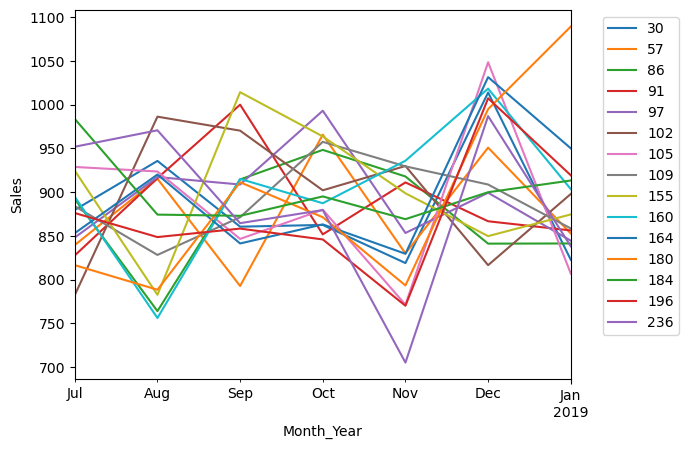

In [23]:
pivot_table2_2.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales')
plt.show()

**Note: On the graph, store 155 seems to follow the same progression as store 86**

**To confirm this finding, perform a pearson correlation on the pivot table**

In [24]:
pivot_table2_2.corr(method= "pearson")

STORE_NBR,30,57,86,91,97,102,105,109,155,160,164,180,184,196,236
STORE_NBR,,,,,,,,,,,,,,,
30,1.000000,0.599159,-0.516913,-0.102928,0.241380,-0.300616,0.952586,-0.131426,-0.480467,0.164579,0.726494,0.056494,0.013921,0.689615,0.805425
57,0.599159,1.000000,-0.218110,-0.488102,0.652317,-0.185459,0.603628,0.326969,-0.413611,-0.024574,0.553408,0.063484,-0.073316,0.393114,0.495600
86,-0.516913,-0.218110,1.000000,0.019027,0.211778,-0.158172,-0.381464,0.788300,0.877882,0.441970,-0.624613,-0.115073,0.072641,-0.373196,-0.520981
91,-0.102928,-0.488102,0.019027,1.000000,0.107347,0.756611,-0.291391,-0.286609,0.285142,-0.124414,-0.307085,-0.157871,-0.703307,-0.323290,-0.251825
97,0.241380,0.652317,0.211778,0.107347,1.000000,0.296909,0.245548,0.378689,0.214531,-0.208412,-0.034539,-0.165523,-0.373501,-0.043617,0.266227
102,-0.300616,-0.185459,-0.158172,0.756611,0.296909,1.000000,-0.515144,-0.305346,-0.017878,-0.554953,-0.307030,-0.208742,-0.826582,-0.540059,-0.355874
105,0.952586,0.603628,-0.381464,-0.291391,0.245548,-0.515144,1.000000,-0.051929,-0.340711,0.201825,0.663660,0.074928,0.281389,0.739672,0.888408
109,-0.131426,0.326969,0.788300,-0.286609,0.378689,-0.305346,-0.051929,1.000000,0.451168,0.548266,-0.219011,-0.104106,-0.037604,-0.159408,-0.364653
155,-0.480467,-0.413611,0.877882,0.285142,0.214531,-0.017878,-0.340711,0.451168,1.000000,0.325977,-0.609502,0.021320,0.074457,-0.247570,-0.332553


**Store 155 has the highest correlation with a correlation of 0.877882 or 87.79%**

### Store 88

**Isolating 10 stores by `TOT_SALES` looking for a match for store 86**

In [25]:
ctrl.iloc[260:]

STORE_NBR
26      8463.40
72      8518.50
199     8654.40
40      8866.80
203     8943.70
4       9127.00
58      9178.75
165     9237.80
237     9369.00
88      9383.60
226    10239.15
Name: TOT_SALES, dtype: float64

**Sorting 10 stores by `TOT_SALES` looking for a match for store 86**

In [26]:
ctrl_str3 = [26, 72, 199, 40, 203, 4, 58, 165, 237, 88, 226]
control_store3 = pd.DataFrame({'Value': total_grp[ctrl_str3]})
control_store3

Value
STORE_NBR Month_Year        
26        2018-07-01  1245.0
          2018-08-01  1092.8
          2018-09-01  1262.8
          2018-10-01  1123.8
          2018-11-01  1248.0
...                      ...
226       2018-09-01  1430.8
          2018-10-01  1519.0
          2018-11-01  1602.6
          2018-12-01  1659.6
          2019-01-01  1347.1

[77 rows x 1 columns]

**Placing the `Value` in a pivot chart format**

In [27]:
pivot_table3 = control_store3.pivot_table(index= "Month_Year", columns= "STORE_NBR", values= "Value")
pivot_table3

STORE_NBR,4,26,40,58,72,88,165,199,203,226,237
Month_Year,,,,,,,,,,,
2018-07-01,1399.9,1245.0,1332.0,1627.20,1323.6,1310.0,1457.0,1299.6,1266.8,1470.00,1448.4
2018-08-01,1259.5,1092.8,1208.0,1043.75,1243.7,1323.8,1206.6,1194.8,1216.8,1210.05,1367.8
2018-09-01,1198.6,1262.8,1312.0,1460.80,1172.6,1423.0,1281.2,1143.8,1266.8,1430.80,1322.2
2018-10-01,1346.4,1123.8,1323.6,1430.00,1224.6,1352.4,1234.4,1323.8,1302.7,1519.00,1348.3
2018-11-01,1212.0,1248.0,1099.4,1165.00,1089.6,1382.8,1291.2,1131.4,1357.0,1602.60,1397.6
2018-12-01,1185.6,1337.4,1335.4,1185.60,1169.0,1325.2,1345.4,1326.2,1336.6,1659.60,1265.0
2019-01-01,1525.0,1153.6,1256.4,1266.40,1295.4,1266.4,1422.0,1234.8,1197.0,1347.10,1219.7


**Visualizing `Value` to find correlation**

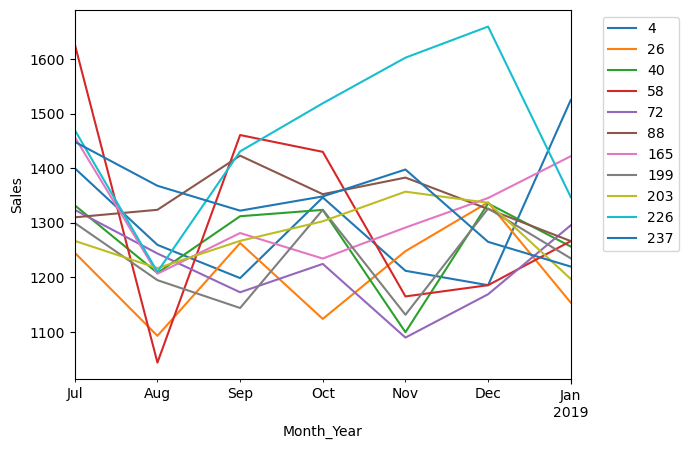

In [28]:
pivot_table3.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Sales')
plt.show()

**Note: On the graph, store 172 seems to follow the same progression as store 86**

**To confirm this finding, perform a pearson correlation on the pivot table**

In [29]:
pivot_table3.corr(method= "pearson")

STORE_NBR,4,26,40,58,72,88,165,199,203,226,237
STORE_NBR,,,,,,,,,,,
4,1.000000,-0.478263,0.173845,0.325008,0.801667,-0.745566,0.577776,0.320490,-0.633085,-0.381353,-0.197444
26,-0.478263,1.000000,0.209662,0.197250,-0.420712,0.300009,0.403447,0.050733,0.616478,0.751146,-0.041857
40,0.173845,0.209662,1.000000,0.621916,0.498730,-0.147851,0.295844,0.717299,-0.148782,0.104695,-0.206879
58,0.325008,0.197250,0.621916,1.000000,0.428535,0.122810,0.475758,0.315575,-0.016633,0.171072,0.332942
72,0.801667,-0.420712,0.498730,0.428535,1.000000,-0.719298,0.512583,0.484882,-0.751649,-0.549507,-0.000518
88,-0.745566,0.300009,-0.147851,0.122810,-0.719298,1.000000,-0.547126,-0.533545,0.508001,0.288573,0.308479
165,0.577776,0.403447,0.295844,0.475758,0.512583,-0.547126,1.000000,0.315680,-0.161184,0.178295,-0.095419
199,0.320490,0.050733,0.717299,0.315575,0.484882,-0.533545,0.315680,1.000000,0.072864,0.290812,-0.117189
203,-0.633085,0.616478,-0.148782,-0.016633,-0.751649,0.508001,-0.161184,0.072864,1.000000,0.909372,0.268468


Store 237 has the highest correlation with store 88 with a correlation of 0.308479 or 31%. With the correlation low, the next option is to search for with a total sale close to store 88 while having a relatively higher correlation.

**Sorting all stores by their level of correlation to store 88**

In [30]:
total_group = pd.DataFrame(total_grp)
total_group_pvt = total_group.pivot_table(index= "Month_Year", columns= "STORE_NBR", values= "TOT_SALES")
total_group_pvt_tbl = total_group_pvt.corr(method="pearson")
total_group_pvt_tbl[88].sort_values(ascending=False).head(10)

STORE_NBR
88     1.000000
159    0.903186
204    0.885774
134    0.864293
1      0.813636
253    0.811838
91     0.776688
61     0.748929
178    0.731857
188    0.716752
Name: 88, dtype: float64

In [31]:
ctrl.loc[[88, 159, 204, 134, 1, 253, 91, 61, 178, 188]]

STORE_NBR
88     9383.60
159     175.40
204     281.40
134    3054.25
1      1386.90
253    2917.10
91     6230.00
61      338.30
178    6544.50
188    1683.50
Name: TOT_SALES, dtype: float64

The top 10 stores with the highest correlation does not come close to store 88 in terms of sales

The only store that has a `TOT_SALES` close to store 88's though having a low correlation of 31% is store 253.

|Trial Store|Total Sale|Control Store|Total Store|
|:---------:|:---------:|:---------:|:---------:|
|77|1699.00|233|1659.8|
|86|6119.85|155|6308.70|
|88|9383.60|237|9369.00|

## Assessment of the Trial 

**Isolating trial time period**

In [32]:
trial_date = df1[(df1['Month_Year'] >= "2019/02") & (df1['Month_Year'] <= "2019/04")]
trial_date['Month_Year'].value_counts()

2019-03-01    22592
2019-04-01    21766
2019-02-01    20405
Name: Month_Year, dtype: int64

**Comparing trial stores to control stores by `TOT_SALES`**

In [33]:
tstore_77 = trial_date[trial_date['STORE_NBR'] == 77]
cstore_233 = trial_date[trial_date['STORE_NBR'] == 233]

tstore_86 = trial_date[trial_date['STORE_NBR'] == 86]
cstore_155 = trial_date[trial_date['STORE_NBR'] == 155]

tstore_88 = trial_date[trial_date['STORE_NBR'] == 88]
cstore_237 = trial_date[trial_date['STORE_NBR'] == 237]

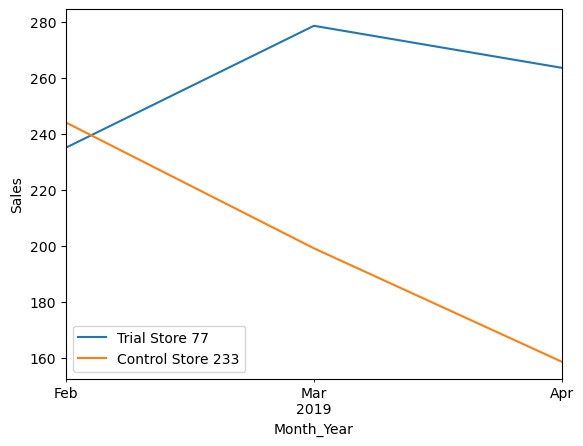

In [34]:
tstore_77.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Trial Store 77")
cstore_233.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Control Store 233")
plt.legend()
plt.ylabel("Sales")
plt.show()

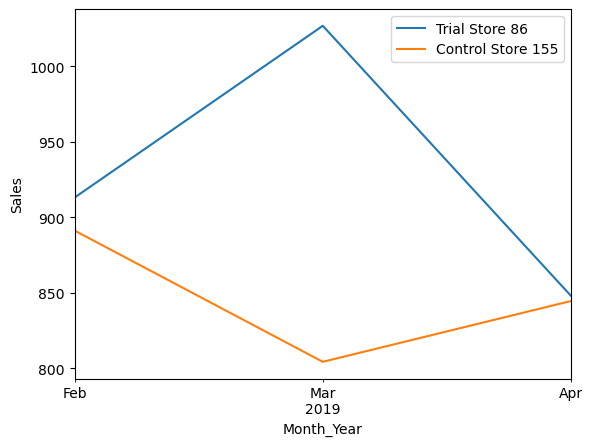

In [35]:
tstore_86.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Trial Store 86")
cstore_155.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Control Store 155")
plt.legend()
plt.ylabel("Sales")
plt.show()

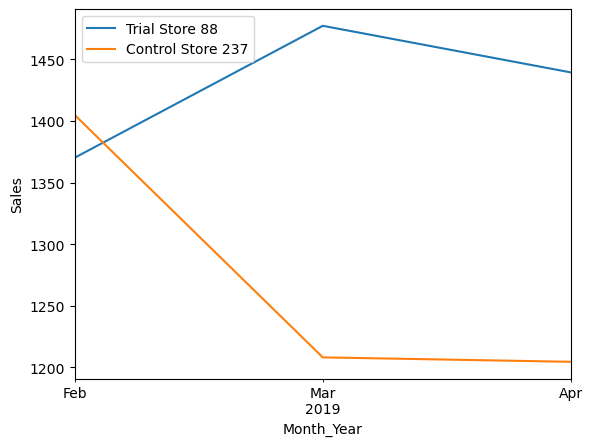

In [36]:
tstore_88.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Trial Store 88")
cstore_237.groupby('Month_Year')['TOT_SALES'].sum().plot(label="Control Store 237")
plt.legend()
plt.ylabel("Sales")
plt.show()

**Comparing trial stores to control stores by `PROD_QTY`**

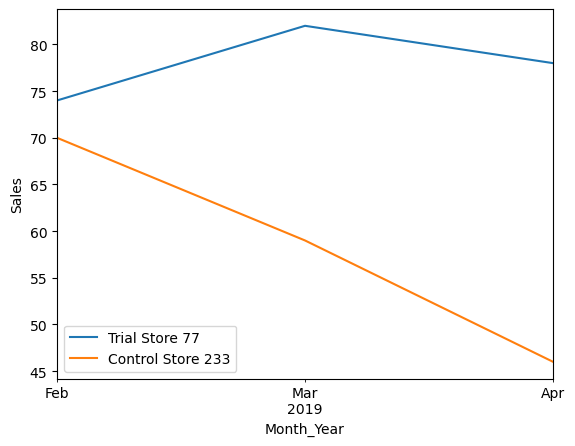

In [37]:
tstore_77.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Trial Store 77")
cstore_233.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Control Store 233")
plt.legend()
plt.ylabel("Sales")
plt.show()

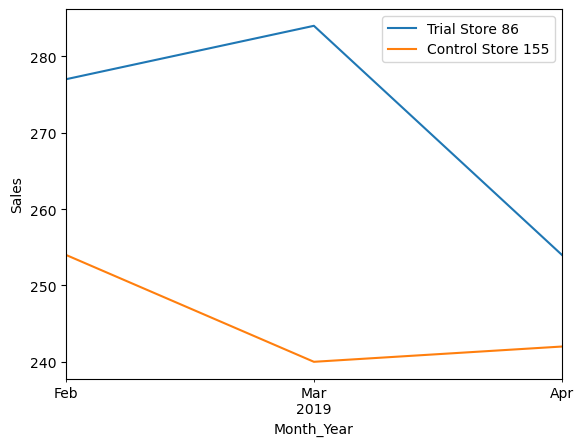

In [38]:
tstore_86.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Trial Store 86")
cstore_155.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Control Store 155")
plt.legend()
plt.ylabel("Sales")
plt.show()

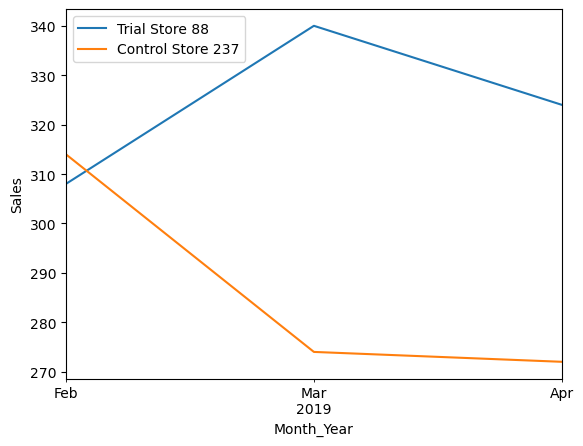

In [39]:
tstore_88.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Trial Store 88")
cstore_237.groupby('Month_Year')['PROD_QTY'].sum().plot(label="Control Store 237")
plt.legend()
plt.ylabel("Sales")
plt.show()

**Average Transaction per customer for Trial and Control stores**

In [40]:
tstore_77.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.0422535211267605

In [41]:
cstore_233.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.0521739130434782

In [42]:
tstore_86.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.2477064220183487

In [43]:
cstore_155.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.2777777777777777

In [44]:
tstore_88.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.2590673575129534

In [45]:
cstore_237.groupby('Month_Year')['LYLTY_CARD_NBR'].value_counts().mean()

1.178082191780822

## Collate Findings

In [46]:
group1 = ['Trial Store 77', 'Control Store 233']
group2 = ['Trial Store 86', 'Control Store 155']
group3 = ['Trial Store 88', 'Control Store 237']

Avg_group1 = [1.042, 1.052]
Avg_group2 = [1.248, 1.278]
Avg_group3 = [1.259, 1.178]

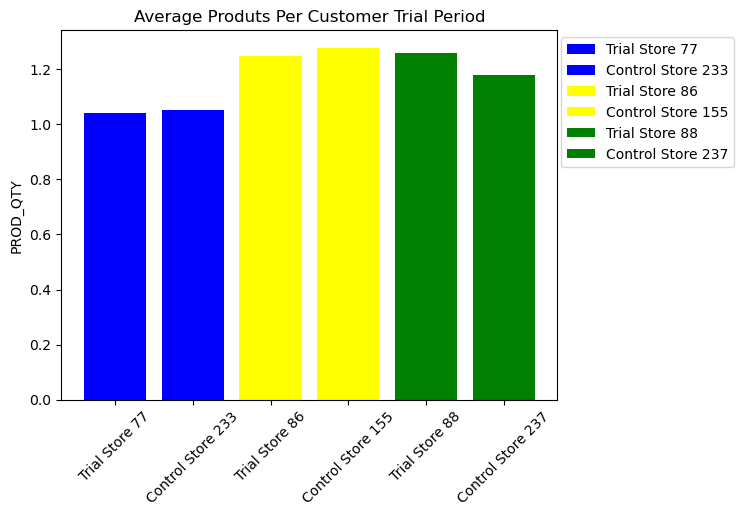

In [47]:
plt.bar(group1, Avg_group1, label=group1, color='blue')
plt.bar(group2, Avg_group2, label=group2, color='yellow')
plt.bar(group3, Avg_group3, label=group3, color='green')
plt.xticks(rotation=45)
plt.ylabel('PROD_QTY')
plt.legend(bbox_to_anchor=(1.37, 1), loc='upper right')
plt.title("Average Produts Per Customer Trial Period")
plt.show()

In [1]:
df1.to_excel("QVI_final dataset.xlsx")

NameError: name 'df1' is not defined